In [3]:
# import necessary libraries
import os
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt


In [4]:
# Function to load reviews from a specified folder

def load_reviews_from_folder(folder_path, label):
    texts = []
    labels = []

    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r', encoding='utf-8') as f:
            texts.append(f.read())
            labels.append(label)

    return texts, labels


In [5]:
# Load training data
base_dir = r"D:\data science\Sentiment_Analysis_Movie_Reviews_Project\clean_dataset1"
train_pos_path = os.path.join(base_dir, "train", "pos")
train_neg_path = os.path.join(base_dir, "train", "neg")

X_train_pos, y_train_pos = load_reviews_from_folder(train_pos_path, 1)
X_train_neg, y_train_neg = load_reviews_from_folder(train_neg_path, 0)

X_train = X_train_pos + X_train_neg
y_train = y_train_pos + y_train_neg


In [6]:
# Load testing data
base_dir = r"D:\data science\Sentiment_Analysis_Movie_Reviews_Project\clean_dataset1"
test_pos_path = os.path.join(base_dir, "test", "pos")
test_neg_path = os.path.join(base_dir, "test", "neg")

X_test_pos, y_test_pos = load_reviews_from_folder(test_pos_path, 1)
X_test_neg, y_test_neg = load_reviews_from_folder(test_neg_path, 0)

X_test = X_test_pos + X_test_neg
y_test = y_test_pos + y_test_neg


In [7]:
# Print dataset sizes and a sample review
print("Training samples:", len(X_train))
print("Test samples:", len(X_test))
print("Sample review:\n", X_train[0][:500])


Training samples: 25000
Test samples: 25000
Sample review:
 Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a s


In [8]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(
    stop_words='english',
    max_df=0.9,
    min_df=5
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [9]:
# Train SVM with linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_tfidf, y_train)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [10]:
# Evaluate the linear model
y_pred = svm_linear.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8722
              precision    recall  f1-score   support

           0       0.87      0.88      0.87     12500
           1       0.88      0.86      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



In [11]:
# Train SVM with polynomial kernel
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train_tfidf, y_train)

y_pred_poly = svm_poly.predict(X_test_tfidf)

print("Polynomial Kernel Accuracy:", accuracy_score(y_test, y_pred_poly))
print(classification_report(y_test, y_pred_poly))


Polynomial Kernel Accuracy: 0.82164
              precision    recall  f1-score   support

           0       0.84      0.80      0.82     12500
           1       0.81      0.84      0.83     12500

    accuracy                           0.82     25000
   macro avg       0.82      0.82      0.82     25000
weighted avg       0.82      0.82      0.82     25000



In [12]:
# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', gamma='scale')
svm_rbf.fit(X_train_tfidf, y_train)

y_pred_rbf = svm_rbf.predict(X_test_tfidf)

print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))


RBF Kernel Accuracy: 0.87888
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12500
           1       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



       Kernel  Accuracy  F1-score
0      Linear   0.87220  0.871091
1  Polynomial   0.82164  0.825486
2         RBF   0.87888  0.878540


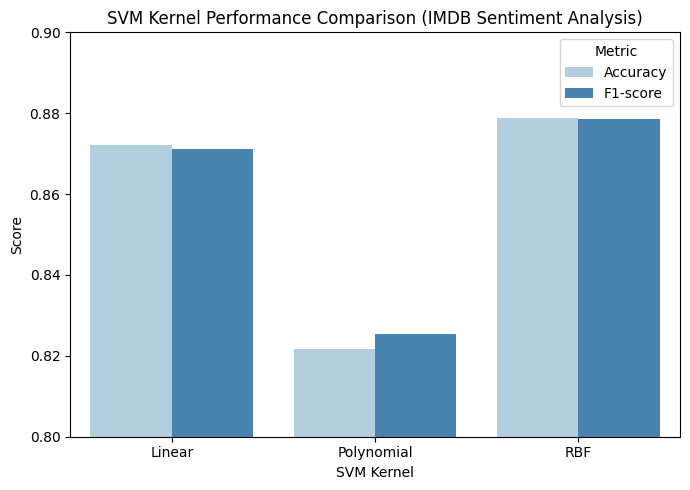

In [13]:
# Compare results & visualize

from sklearn.metrics import f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

results = []

# Linear
results.append({
    "Kernel": "Linear",
    "Accuracy": accuracy_score(y_test, y_pred),
    "F1-score": f1_score(y_test, y_pred)
})

# Polynomial
results.append({
    "Kernel": "Polynomial",
    "Accuracy": accuracy_score(y_test, y_pred_poly),
    "F1-score": f1_score(y_test, y_pred_poly)
})

# RBF
results.append({
    "Kernel": "RBF",
    "Accuracy": accuracy_score(y_test, y_pred_rbf),
    "F1-score": f1_score(y_test, y_pred_rbf)
})

comparison_df = pd.DataFrame(results)
print(comparison_df)

comparison_long = comparison_df.melt(
    id_vars="Kernel",
    value_vars=["Accuracy", "F1-score"],
    var_name="Metric",
    value_name="Score"
)

plt.figure(figsize=(7, 5))

sns.barplot(
    data=comparison_long,
    x="Kernel",
    y="Score",
    hue="Metric",
    palette="Blues"
)

plt.ylim(0.8, 0.9)
plt.title("SVM Kernel Performance Comparison (IMDB Sentiment Analysis)")
plt.ylabel("Score")
plt.xlabel("SVM Kernel")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

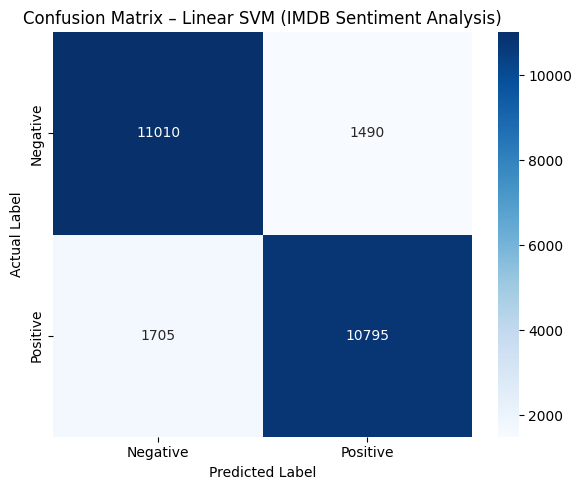

In [16]:
# Confusion Matrix for Linear SVM
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))

sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Negative', 'Positive'],
    yticklabels=['Negative', 'Positive']
)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix – Linear SVM (IMDB Sentiment Analysis)')
plt.tight_layout()
plt.show()


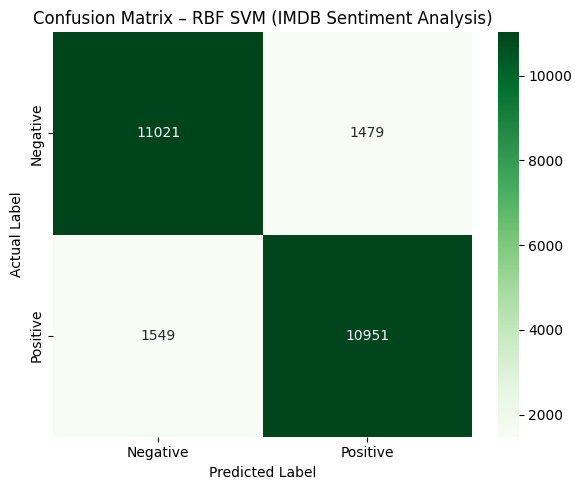

In [26]:
# confusion matrix for SVM with RBF kernel
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_rbf,
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=['Negative', 'Positive'],
    yticklabels=['Negative', 'Positive']
)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix – RBF SVM (IMDB Sentiment Analysis)')
plt.tight_layout()
plt.show()

In [ ]:
# Save models and vectorizer in local directory
import joblib
import os

# Create a folder to store models
os.makedirs("saved_models", exist_ok=True)

# Save models
joblib.dump(svm_linear, "saved_models/svm_linear.pkl")
joblib.dump(svm_poly, "saved_models/svm_poly.pkl")
joblib.dump(svm_rbf, "saved_models/svm_rbf.pkl")

# Save TF-IDF vectorizer
joblib.dump(tfidf, "saved_models/tfidf_vectorizer.pkl")

print("All models saved successfully!")


In [ ]:
# Save evaluation outputs in local directory
import joblib
import os

# Create directory if not exists
os.makedirs("saved_models/evaluation", exist_ok=True)

# Save ground truth
joblib.dump(y_test, "saved_models/evaluation/y_test.pkl")

# Save predictions
joblib.dump(y_pred, "saved_models/evaluation/y_pred_linear.pkl")
joblib.dump(y_pred_poly,   "saved_models/evaluation/y_pred_poly.pkl")
joblib.dump(y_pred_rbf,    "saved_models/evaluation/y_pred_rbf.pkl")

print("Evaluation outputs saved successfully!")
